In [ ]:
# Machine Learning Workflows for Various Datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits, load_iris
from sklearn.feature_extraction.text import TfidfVectorizer


--- Loan Prediction ---
Mean Squared Error: 1159.069937259487
Root Mean Squared Error: 34.045116202760816
Mean Absolute Error: 23.455179451932064
R2 Score: 0.6855804076957606
Adjusted R2 Score: 0.6466522676961881


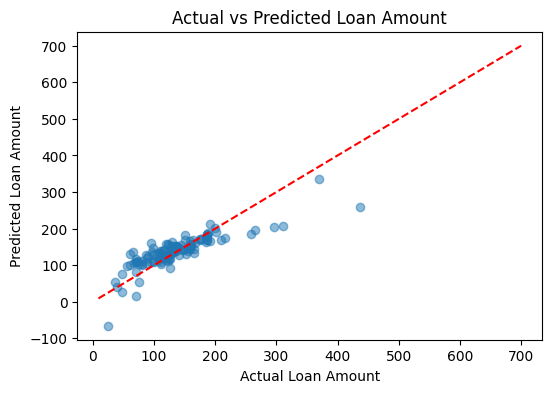

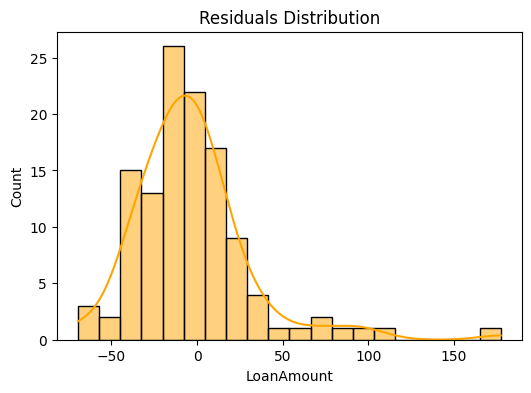

In [ ]:
# i) Loan Amount Prediction
print("\n--- Loan Prediction ---")
df = pd.read_csv("train_u6lujuX_CVtuZ9i.xls")

# Drop Loan_ID
df.drop('Loan_ID', axis=1, inplace=True)

# Drop rows where LoanAmount (target) is missing
df = df.dropna(subset=['LoanAmount'])

# Identify Numerical and Categorical Columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('LoanAmount')  # Exclude target

categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Handle Missing Values
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Target-Guided Ordinal Encoding for Categorical Columns
for col in categorical_cols:
    ordering = df.groupby(col)["LoanAmount"].mean().sort_values().index
    ordinal_map = {key: idx for idx, key in enumerate(ordering)}
    df[col] = df[col].map(ordinal_map)

# Limited Feature Engineering (since dataset lacks property price etc.)
df['IncomeToLoanRatio'] = (df['ApplicantIncome'] + df['CoapplicantIncome']) / (df['LoanAmount'] + 1)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Define Features and Target
X = df.drop('LoanAmount', axis=1)
y = df['LoanAmount']

# Standard Scaling (outliers present)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_test_pred = model.predict(X_test)

# Performance Metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
n, p = X_test.shape
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)
print("Adjusted R2 Score:", adjusted_r2)

# Actual vs Predicted Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted Loan Amount")
plt.show()

# Residual Distribution Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residuals Distribution")
plt.show()


--- Handwritten Digit Recognition ---
Accuracy: 0.975925925925926
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       1.00      1.00      1.00        55
           2       1.00      0.98      0.99        53
           3       1.00      0.89      0.94        55
           4       0.96      1.00      0.98        54
           5       0.95      0.96      0.95        55
           6       1.00      0.98      0.99        54
           7       0.98      1.00      0.99        54
           8       0.93      0.98      0.95        52
           9       0.96      0.98      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



<Figure size 640x480 with 0 Axes>

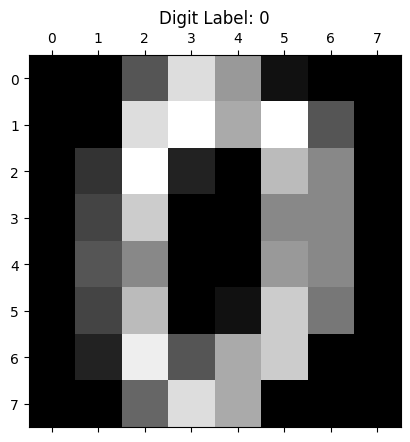

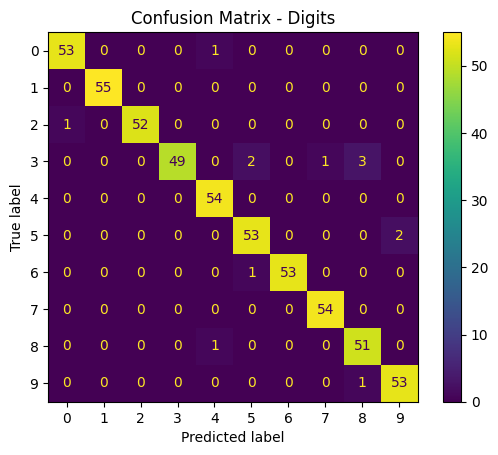

In [ ]:
# ii) Handwritten Digit Recognition
print("\n--- Handwritten Digit Recognition ---")
digits = load_digits()
X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Digit Image Visualization
plt.gray()
plt.matshow(digits.images[0])
plt.title(f"Digit Label: {digits.target[0]}")
plt.show()

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix - Digits")
plt.show()


--- Email Spam Classification ---
Accuracy: 0.968609865470852
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



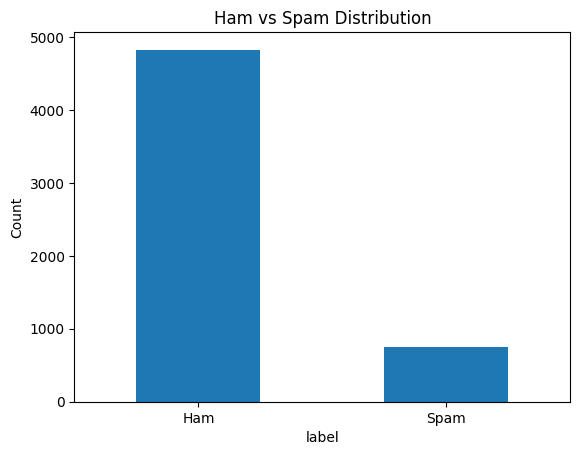

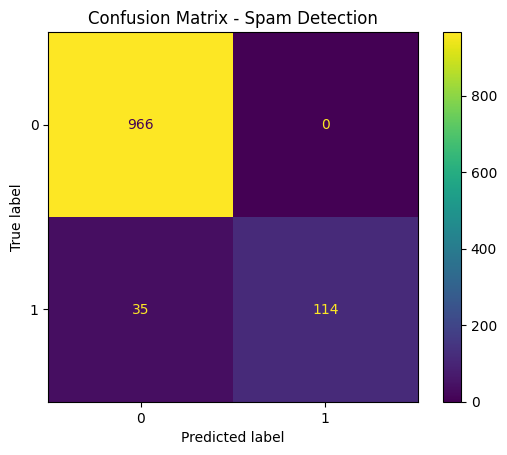

In [ ]:
# iii) Spam Email Classification
print("\n--- Email Spam Classification ---")
spam_df = pd.read_csv("spam.csv", encoding="latin-1")[["v1", "v2"]]
spam_df.columns = ["label", "message"]
spam_df['label'] = spam_df['label'].map({"ham": 0, "spam": 1})
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(spam_df['message'])
y = spam_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Spam Distribution
spam_df['label'].value_counts().plot(kind='bar')
plt.title("Ham vs Spam Distribution")
plt.xticks([0,1], ['Ham', 'Spam'], rotation=0)
plt.ylabel("Count")
plt.show()

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix - Spam Detection")
plt.show()


--- Diabetes Prediction ---
Accuracy: 0.7012987012987013
[[81 19]
 [27 27]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



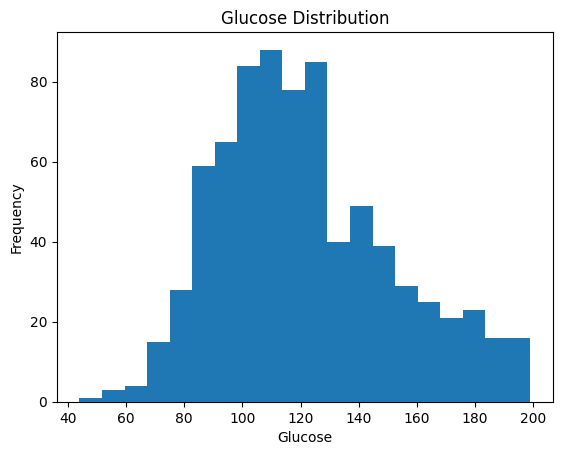

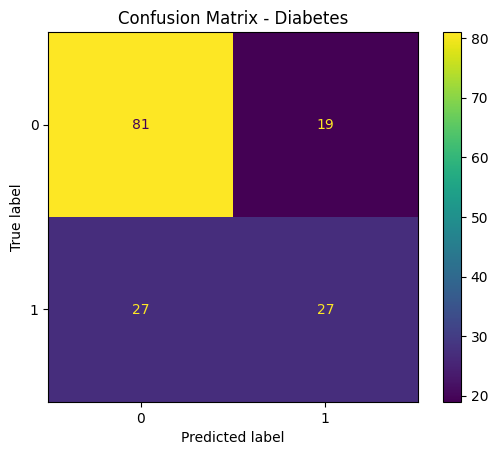

In [ ]:
# iv) Diabetes Prediction
print("\n--- Diabetes Prediction ---")
diabetes = pd.read_csv("diabetes.csv")
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[cols_with_zero] = diabetes[cols_with_zero].replace(0, np.nan)
diabetes.fillna(diabetes.median(numeric_only=True), inplace=True)

X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

# Use StandardScaler due to outliers
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model = LogisticRegression(max_iter=200).fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.hist(diabetes['Glucose'].dropna(), bins=20)
plt.title("Glucose Distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix - Diabetes")
plt.show()



--- Iris Dataset Classification ---
Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



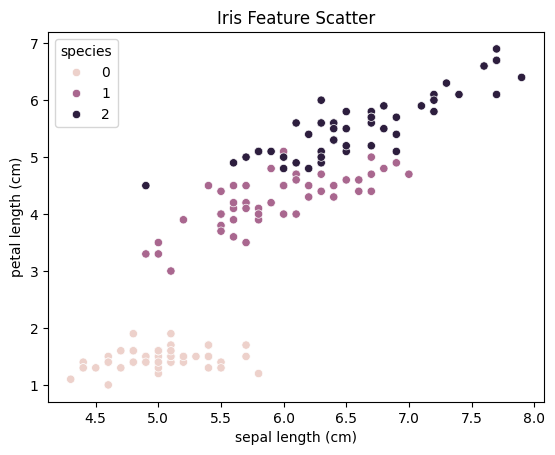

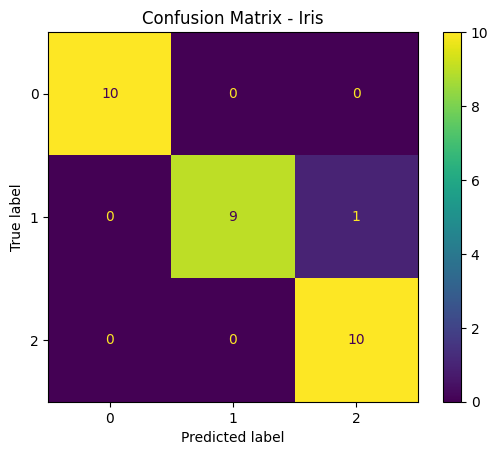

In [ ]:
# v) Iris Classification
print("\n--- Iris Dataset Classification ---")
iris = load_iris()
X, y = iris.data, iris.target

# Apply StandardScaler due to small numerical differences
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
model = SVC().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title("Iris Feature Scatter")
plt.show()

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix - Iris")
plt.show()
